Title: 


Introduction:
Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
Clearly state the question you will try to answer with your project

Preliminary exploratory data analysis:

Demonstrate that the dataset can be read from the web into R 
Clean and wrangle your data into a tidy format
Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)
options(repr.matrix.max.rows = 6)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [11]:
url <- "https://github.com/JackyLinllk/ubc_dsci100_assignment/raw/main/data/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.csv"

data_training<-read_csv(url)|>
    select(STG:UNS)|>
    mutate(UNS = as.factor(UNS))
data_training


New names:
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
Rows: 258 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): UNS
dbl (5): STG, SCG, STR, LPR, PEG
lgl (3): ...7, ...8, ...9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


In [3]:
data_training_na <- sum(is.na(data_training))
data_training_na

data_training_summary <- data_training|>
    group_by(UNS)|>
    summarize(count = n())
data_training_summary

data_training_mean <- data_training |>
    summarize(across(STG:PEG, mean))|>
    pivot_longer(STG:PEG, names_to = "Variable", values_to = "Mean")|>
    select(Mean)

data_training_min <- data_training |>
    summarize(across(STG:PEG, min))|>
    pivot_longer(STG:PEG, names_to = "Variable", values_to = "Min")|>
    select(Min)
    
data_training_max <- data_training |>
    summarize(across(STG:PEG, max))|>
    pivot_longer(STG:PEG, names_to = "Variable", values_to = "Max") 

data_training_value_Summary <- bind_cols(data_training_max, data_training_mean, data_training_min)
data_training_value_Summary

[1] 0

UNS,count
<fct>,<int>
High,63
Low,83
Middle,88
very_low,24


Variable,Max,Mean,Min
<chr>,<dbl>,<dbl>,<dbl>
STG,0.99,0.3711473,0
SCG,0.90,0.3556744,0
STR,0.95,0.4680039,0
LPR,0.99,0.4327132,0
PEG,0.93,0.4585388,0


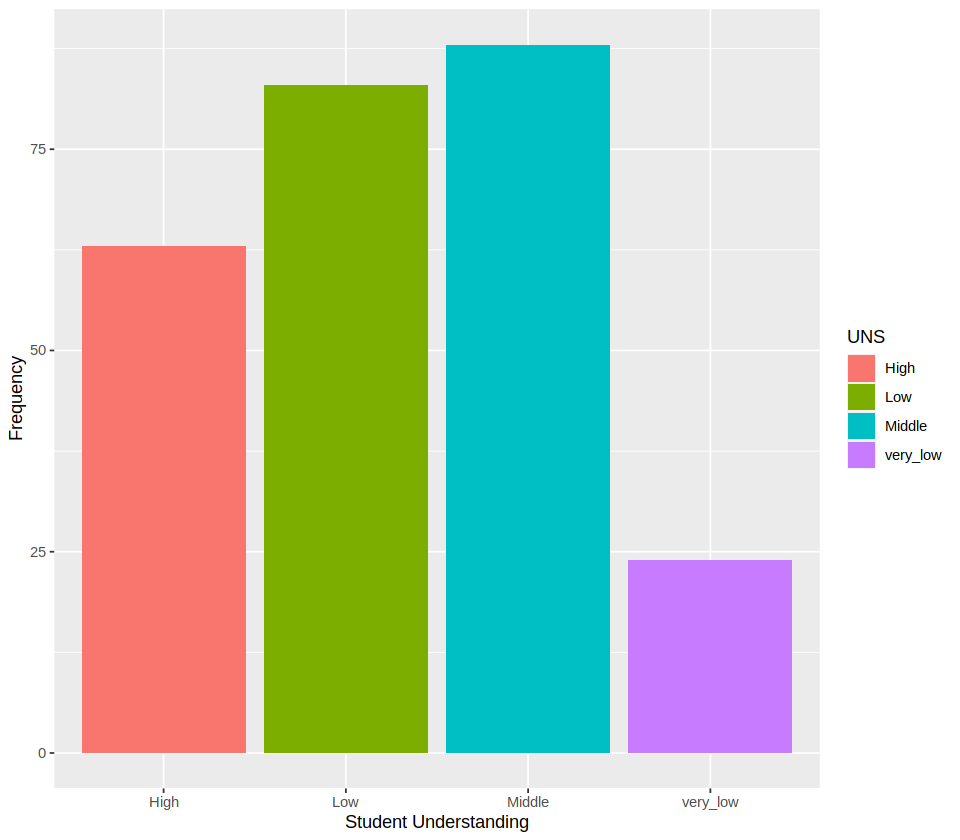

In [14]:
UNS_count_plot <- ggplot(data_training_summary, aes(x = UNS, y = count, fill = UNS)) + 
    geom_bar(stat = "identity") +
    xlab("Student Understanding") +
    ylab("Frequency")
UNS_count_plot

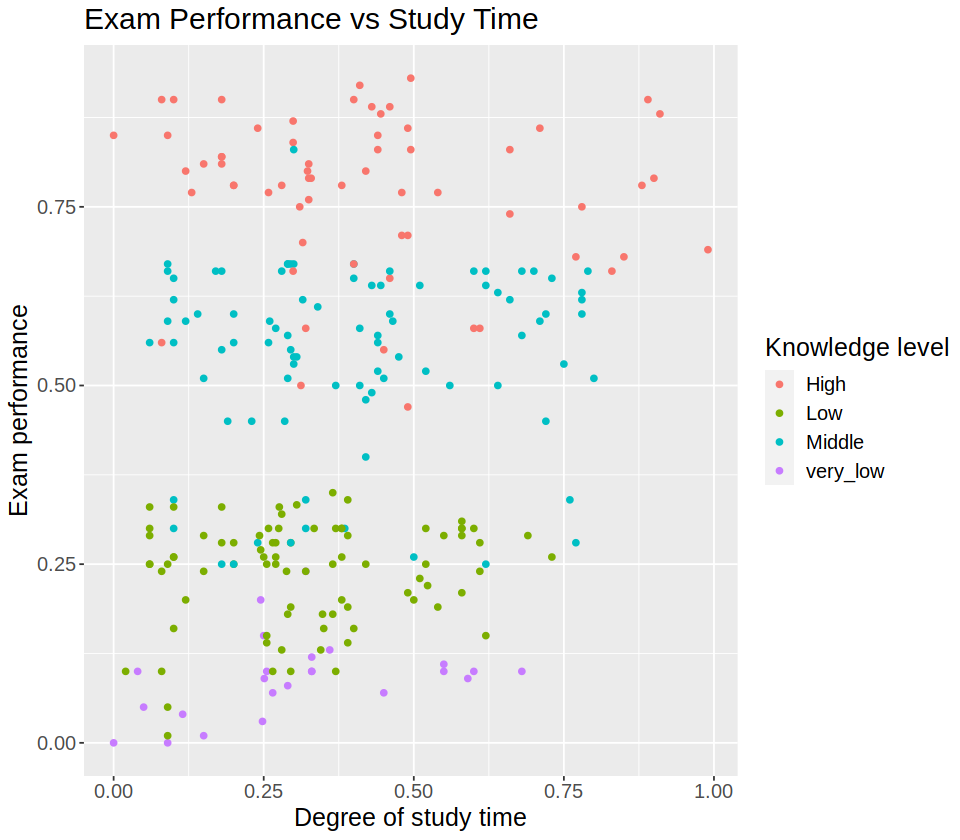

In [4]:
options(repr.plot.height = 7, repr.plot.width = 8)

data_plot <- ggplot(data_training, aes(x= STG,y= PEG, color = UNS))+
    geom_point() +
    labs(x="Degree of study time", y= "Exam performance", color = "Knowledge level")+
    ggtitle("Exam Performance vs Study Time")+
    theme(text = element_text(size = 15))
data_plot


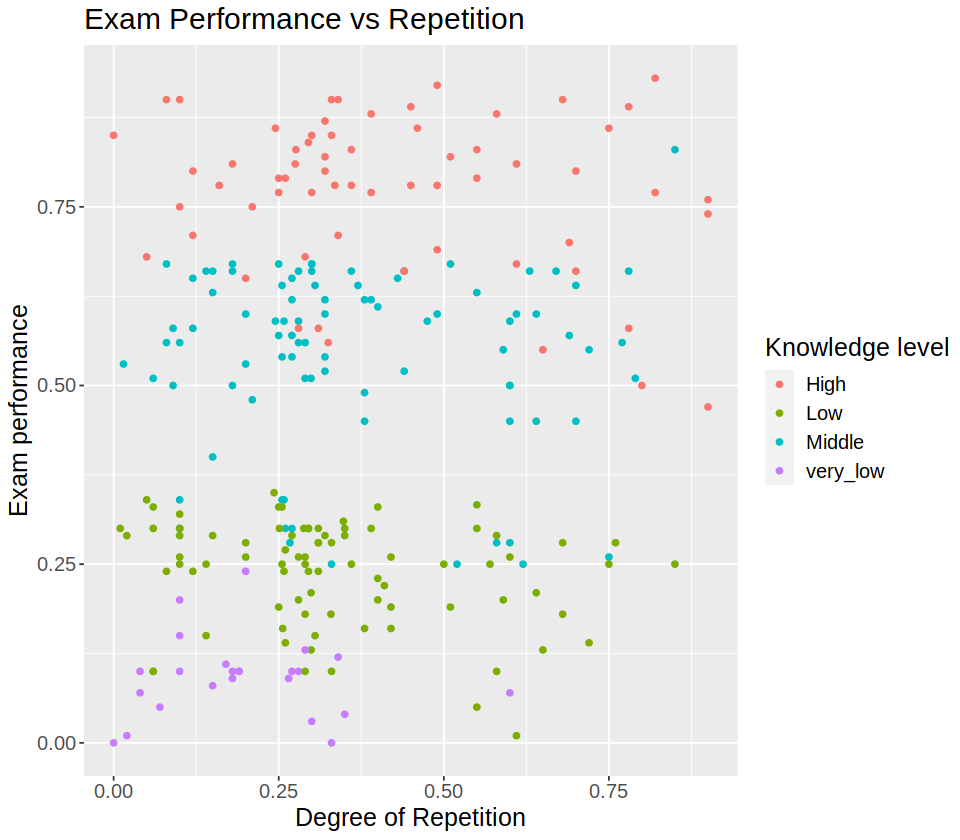

In [6]:
data_plot_1 <- ggplot(data_training, aes(x= SCG,y= PEG, color = UNS))+
    geom_point()+
    labs(x="Degree of Repetition", y= "Exam performance", color = "Knowledge level")+
    ggtitle("Exam Performance vs Repetition")+
    theme(text = element_text(size = 15))
data_plot_1

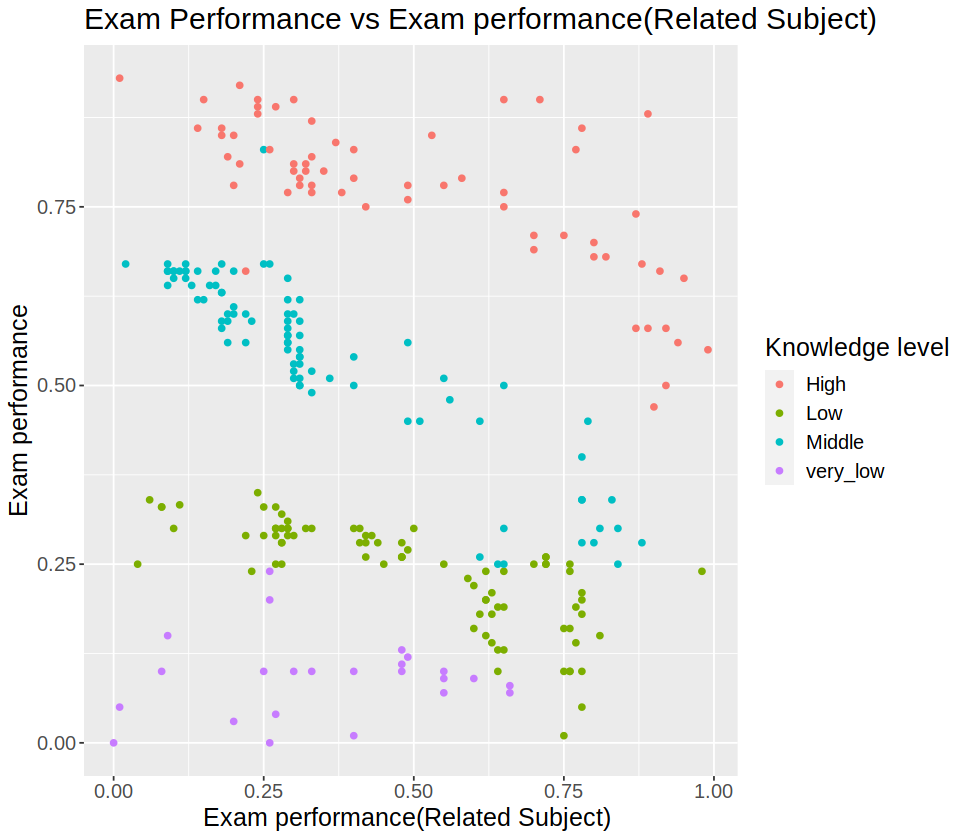

In [7]:
data_plot_3 <- ggplot(data_training, aes(x= LPR,y= PEG, color = UNS))+
    geom_point() +
    labs(x="Exam performance(Related Subject) ", y= "Exam performance", color = "Knowledge level")+
    ggtitle("Exam Performance vs Exam performance(Related Subject)")+
    theme(text = element_text(size = 15))
data_plot_3

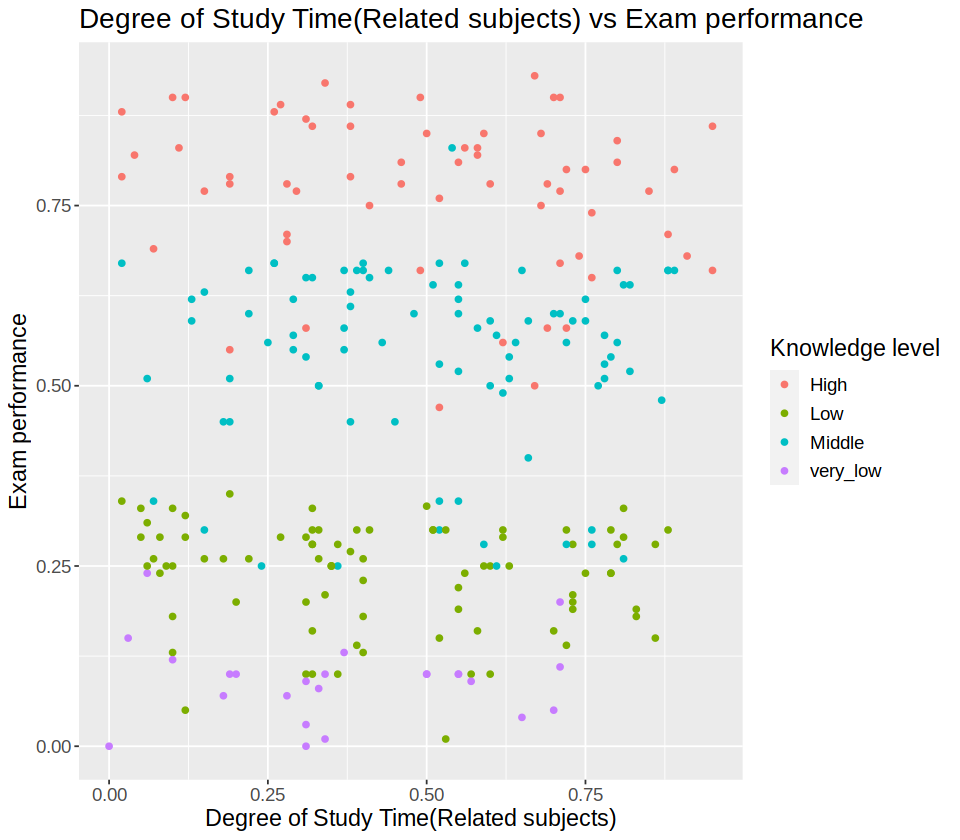

In [8]:
data_plot_4 <- ggplot(data_training, aes(x= STR,y= PEG, color = UNS))+
    geom_point() +
    labs(x="Degree of Study Time(Related subjects)", y= "Exam performance", color = "Knowledge level")+
    ggtitle("Degree of Study Time(Related subjects) vs Exam performance")+
    theme(text = element_text(size = 14))
data_plot_4

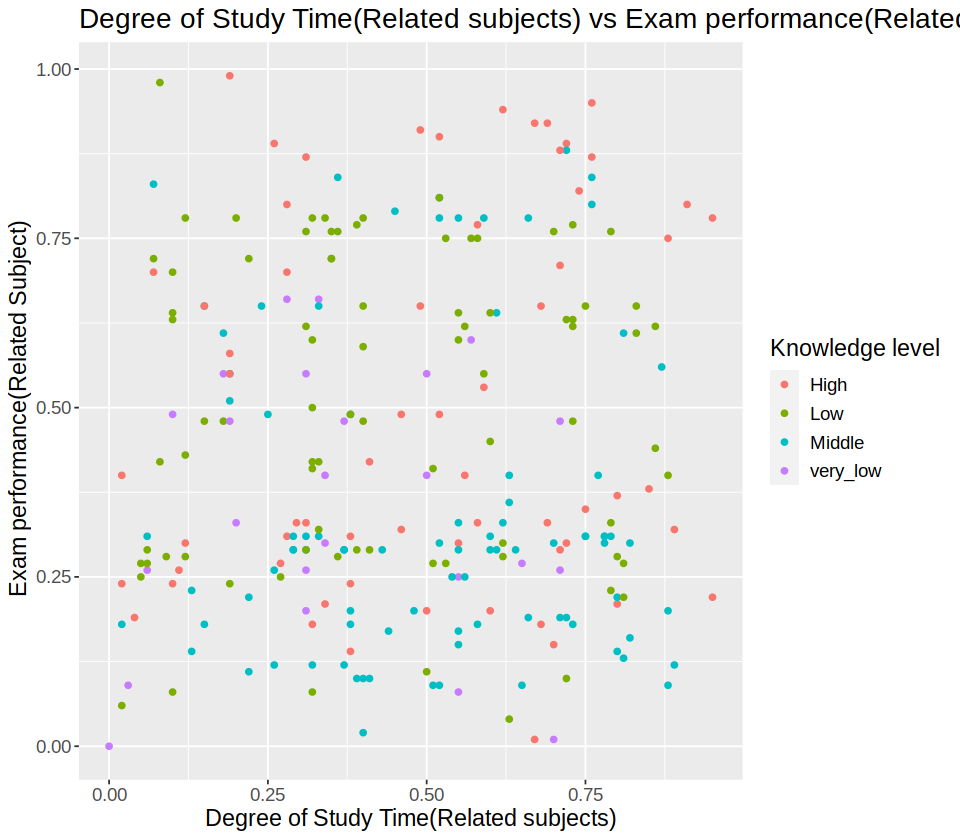

In [9]:
data_plot_5 <- ggplot(data_training, aes(x= STR,y= LPR, color = UNS))+
    geom_point() +
    labs(x="Degree of Study Time(Related subjects)", y= " Exam performance(Related Subject)", color = "Knowledge level")+
    ggtitle("Degree of Study Time(Related subjects) vs Exam performance(Related Subject)")+
    theme(text = element_text(size = 14))
data_plot_5

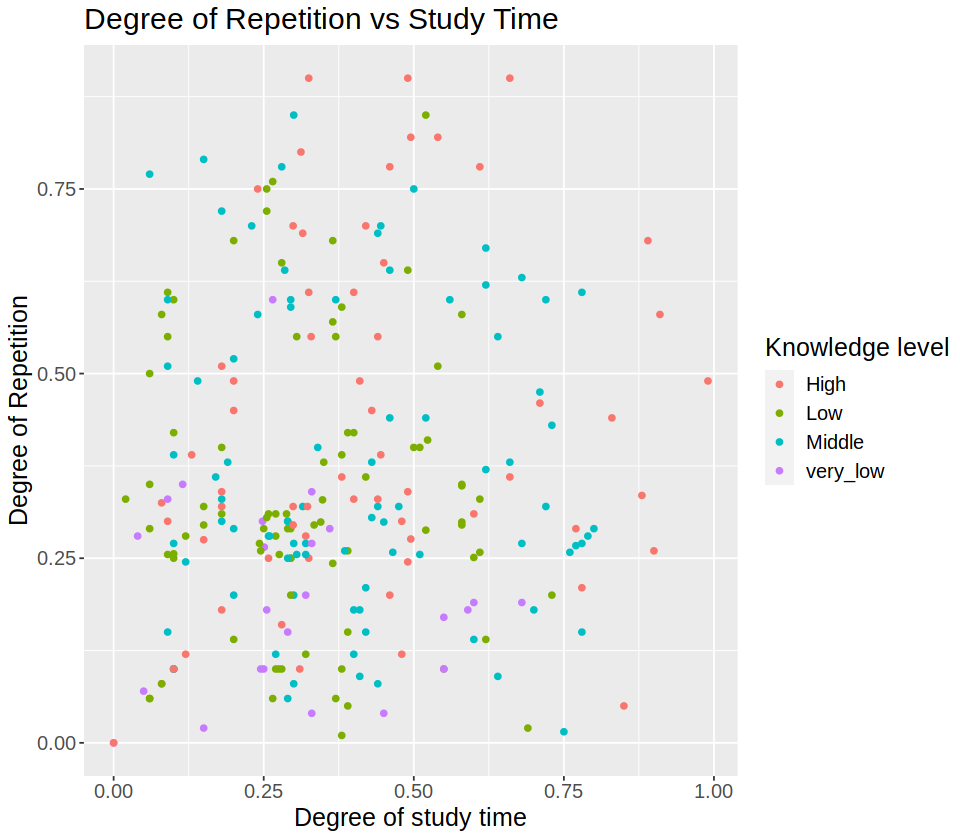

In [10]:
data_plot_6 <- ggplot(data_training, aes(x= STG,y= SCG, color = UNS))+
    geom_point() +
    labs(x="Degree of study time", y= "Degree of Repetition", color = "Knowledge level")+
    ggtitle("Degree of Repetition vs Study Time")+
    theme(text = element_text(size = 15))
data_plot_6

Methods:
Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
Describe at least one way that you will visualize the results

Expected outcomes and significance:
What do you expect to find?
What impact could such findings have?
What future questions could this lead to?